This example of Nonlinear SVM Classification uses a polynomial kernel.

Code adapted from "Hands-On Machine Learning with Scikit-Learn and Tensorflow: Concepts, Tools and Techniques to Build Intelligent Systems" by Aurélien Géron

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(noise = 0.1)

Plot the data to see what it looks like

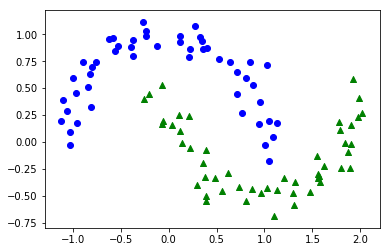

In [3]:
plt.scatter([x[0] for x in X[y==0]], [x[1] for x in X[y==0]], marker='o', color='b')
plt.scatter([x[0] for x in X[y==1]], [x[1] for x in X[y==1]], marker='^', color='g')
plt.show()

In [4]:
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))

poly_kernel_svm_clf.fit(X ,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

Redo the plot with the prediction curve this time

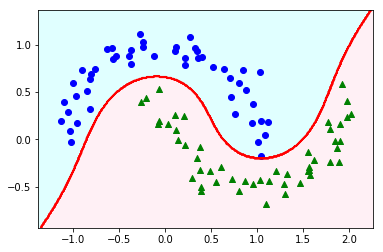

In [5]:
x_min, x_max = X[:,0].min() - 0.25, X[:,0].max() + 0.25
y_min, y_max = X[:,1].min() - 0.25, X[:,1].max() + 0.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx,yy,Z, colors=('red')) # Draw the curve
plt.contourf(xx,yy,Z,1, colors=('lightcyan', 'lavenderblush')) # Shades the areas
plt.scatter([x[0] for x in X[y==0]], [x[1] for x in X[y==0]], marker='o', color='b')
plt.scatter([x[0] for x in X[y==1]], [x[1] for x in X[y==1]], marker='^', color='g')
plt.show()